In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

## 字段含义
satisfaction_level:表示该员工对公司的满意度。  
last_evaluation:该员工的对于公司的价值（取值为0-1，越高价值越大）  
number_project:该员工总共完成的项目数  
average_monthly_hours:平均每月工作时间  
work_accident：是否出现过工作事故  
left：是否已经离职（0表示未离职，1表示已经离职）  
promotion_last_5years:在过去的5年中是否得到过升职  
sales：工作岗位  
salary：薪资水平（共三档。）PS(不要问我划分标准是什么。。。我表示我也很好奇)  

## 导入数据集

In [65]:
filename = 'HR_comma_sep.csv'
data = pd.read_csv(filename)
data.head()
#data.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
variable_corr =data.corr()

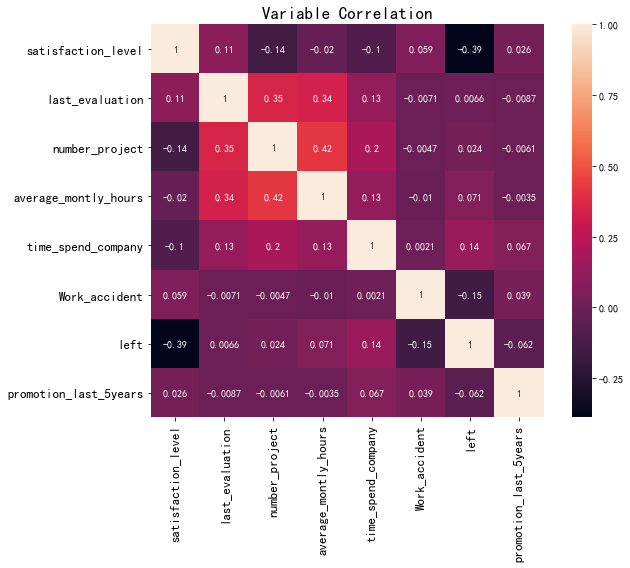

In [278]:
fig = plt.figure(figsize=(10, 8))
#sns.heatmap(variable_corr,annot=True,square=True)
#mask = np.zeros_like(variable_corr)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(variable_corr,annot=True,square=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Variable Correlation',fontsize=17)
plt.tight_layout()
plt.show()

员工的满意度Last evaluation，项目数量Number of projects 和月平均工作时间Number of projects三者之间有很显著的相关性
b. Number of projects
c. Average monthly hours
从图中可以看到，与离职相关的因素依次是满意度（-0.39）薪资（-0.16），工伤（-0.15），
工作年限（0.14），工作时间（0.07），升职（-0.06）完成项目（0.02），绩效（0.01）。
通过上图我们可以得知，1.员工的满意度和该员工的公司价值关系更加明显。2.如果我们得到升职后，我们将更加情愿的进行工作（因为我们可以很明显的发现每月工作时间与其更有联系）。这张图可以更加明显的告诉我们这9个变量之间的相关度。

In [8]:
data.groupby(['salary']).describe().transpose()

salary                              high          low       medium
Work_accident         count  1237.000000  7316.000000  6446.000000
                      mean      0.155214     0.142154     0.145361
                      std       0.362255     0.349232     0.352492
                      min       0.000000     0.000000     0.000000
                      25%       0.000000     0.000000     0.000000
                      50%       0.000000     0.000000     0.000000
                      75%       0.000000     0.000000     0.000000
                      max       1.000000     1.000000     1.000000
average_montly_hours  count  1237.000000  7316.000000  6446.000000
                      mean    199.867421   200.996583   201.338349
                      std      47.710446    50.832214    49.344188
                      min      96.000000    96.000000    96.000000
                      25%     161.000000   155.000000   156.000000
                      50%     199.000000   199.000000   201.000000
                      75%     241.000000   246.000000   245.000000
                      max     307.000000   310.000000   310.000000
last_evaluation       count  1237.000000  7316.000000  6446.000000
                      mean      0.704325     0.717017     0.717322
                      std       0.158608     0.173261     0.171043
                      min       0.360000     0.360000     0.360000
                      25%       0.570000     0.550000     0.560000
                      50%       0.700000     0.720000     0.720000
                      75%       0.840000     0.870000     0.870000
                      max       1.000000     1.000000     1.000000
left                  count  1237.000000  7316.000000  6446.000000
                      mean      0.066289     0.296884     0.204313
                      std       0.248888     0.456916     0.403230
                      min       0.000000     0.000000     0.000000
                      25%       0.000000     0.000000     0.000000
                      50%       0.000000     0.000000     0.000000
...                                  ...          ...          ...
number_project        std       1.088684     1.281822     1.201232
                      min       2.000000     2.000000     2.000000
                      25%       3.000000     3.000000     3.000000
                      50%       4.000000     4.000000     4.000000
                      75%       5.000000     5.000000     5.000000
                      max       7.000000     7.000000     7.000000
promotion_last_5years count  1237.000000  7316.000000  6446.000000
                      mean      0.058205     0.009021     0.028079
                      std       0.234226     0.094558     0.165213
                      min       0.000000     0.000000     0.000000
                      25%       0.000000     0.000000     0.000000
                      50%       0.000000     0.000000     0.000000
                      75%       0.000000     0.000000     0.000000
                      max       1.000000     1.000000     1.000000
satisfaction_level    count  1237.000000  7316.000000  6446.000000
                      mean      0.637470     0.600753     0.621817
                      std       0.226791     0.254594     0.245069
                      min       0.090000     0.090000     0.090000
                      25%       0.500000     0.420000     0.450000
                      50%       0.660000     0.630000     0.660000
                      75%       0.810000     0.810000     0.820000
                      max       1.000000     1.000000     1.000000
time_spend_company    count  1237.000000  7316.000000  6446.000000
                      mean      3.692805     3.438218     3.529010
                      std       1.977885     1.303818     1.506442
                      min       2.000000     2.000000     2.000000
                      25%       3.000000     3.000000     3.000000
                      50%       3.000000     3.

In [64]:
data['salary'].unique()

array(['low'], dtype=object)

In [17]:
salary_low=data[data['salary']=='low']
len(salary_low)

7316

In [9]:
#因为共有十个变量，所以要/10
salary_low=data[data['salary']=='low']
salary_medium=data[data['salary']=='medium']
salary_high=data[data['salary']=='high']
print('the number of salary_low:',salary_low.size/10)
print('the number of salary_medium:',salary_medium.size/10)
print('the number of salary_high:',salary_high.size/10)
salary_low_mean=salary_low.mean()
salary_low_std=salary_low.std()
print(salary_low_mean.values.T)
print(salary_low_std.values.T)
salary_medium_mean=salary_medium.mean()
salary_medium_std=salary_medium.std()
print(salary_medium_mean)
print(salary_medium_std)
salary_high_mean=salary_high.mean()
salary_high_std=salary_high.std()
print(salary_high_mean)
print(salary_high_std)


the number of salary_low: 7316.0
the number of salary_medium: 6446.0
the number of salary_high: 1237.0
[  6.00753144e-01   7.17017496e-01   3.79989065e+00   2.00996583e+02
   3.43821761e+00   1.42154183e-01   2.96883543e-01   9.02132313e-03]
[  0.25459376   0.17326061   1.28182201  50.8322142    1.30381817
   0.34923207   0.45691601   0.09455771]
satisfaction_level         0.621817
last_evaluation            0.717322
number_project             3.813528
average_montly_hours     201.338349
time_spend_company         3.529010
Work_accident              0.145361
left                       0.204313
promotion_last_5years      0.028079
dtype: float64
satisfaction_level        0.245069
last_evaluation           0.171043
number_project            1.201232
average_montly_hours     49.344188
time_spend_company        1.506442
Work_accident             0.352492
left                      0.403230
promotion_last_5years     0.165213
dtype: float64
satisfaction_level         0.637470
last_evaluation  

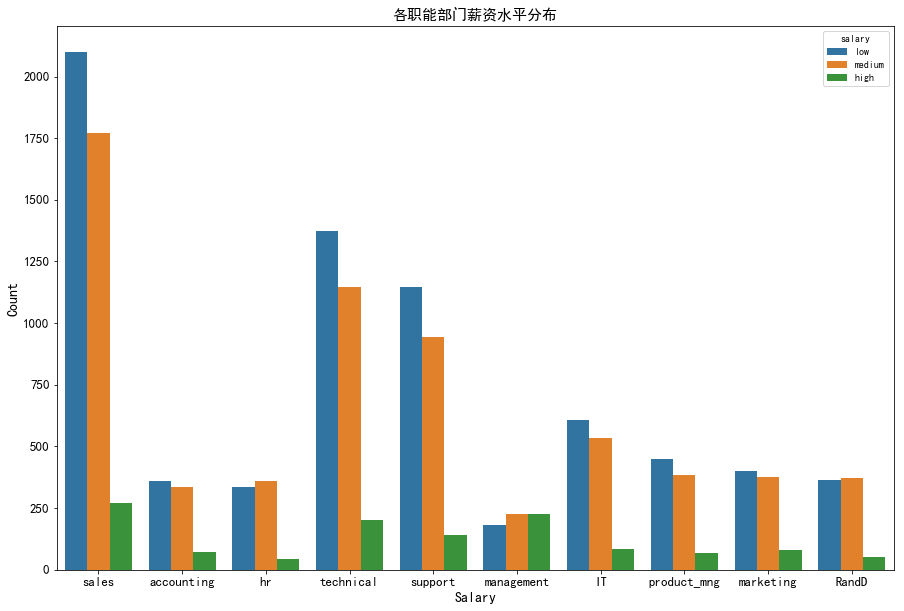

In [185]:
fig  = plt.figure(figsize = (15,10))

#fig,ax=plt.subplots(figsize=(15,10))
#plt.subplot(3,1,1)
sns.countplot(x='sales',hue = 'salary' ,data=data,order = data['sales'].unique())
plt.title('各职能部门薪资水平分布',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

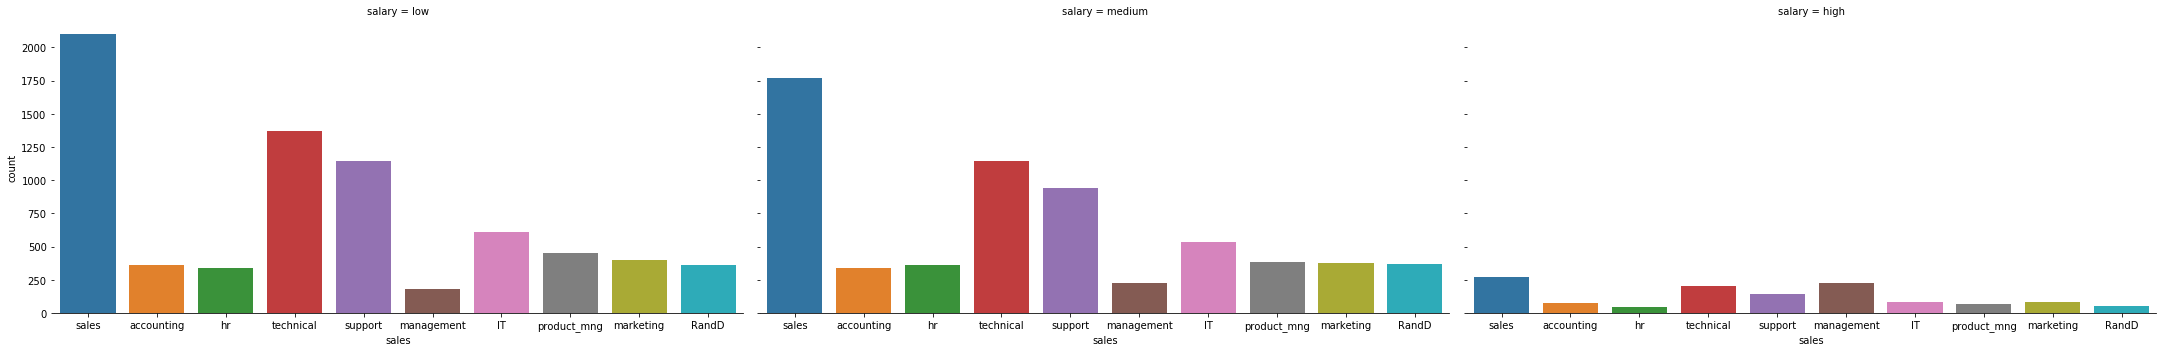

In [156]:
#fig, ax = plt.subplots(figsize=(15,10))
fig = plt.figure()
sns.factorplot(x='sales',kind='count',data=data,col='salary',size = 5,aspect = 2,col_wrap = 3)
#g.set_axis_labels("", "Survival Rate")
#g.set_xticklabels(rotation = 45)
#g.set_xlabels()
#g.set(ylim=(0, 1))
#
#sns.despine(left=True)
plt.show()

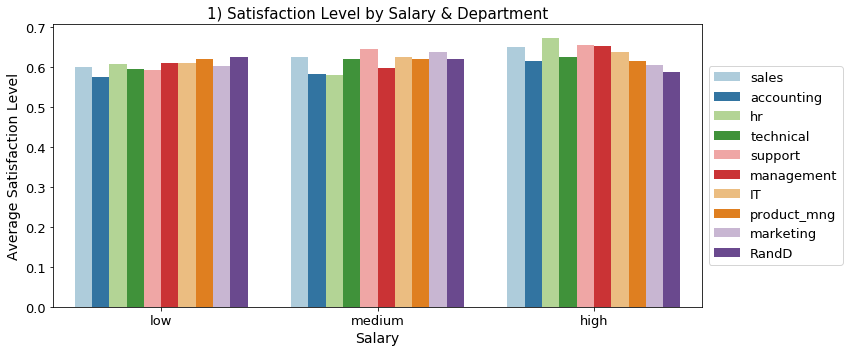

In [162]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x='salary', y='satisfaction_level', hue='sales', data=data, palette='Paired',ci=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':13})
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Average Satisfaction Level',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('1) Satisfaction Level by Salary & Department',fontsize=15)
plt.tight_layout()
plt.show()

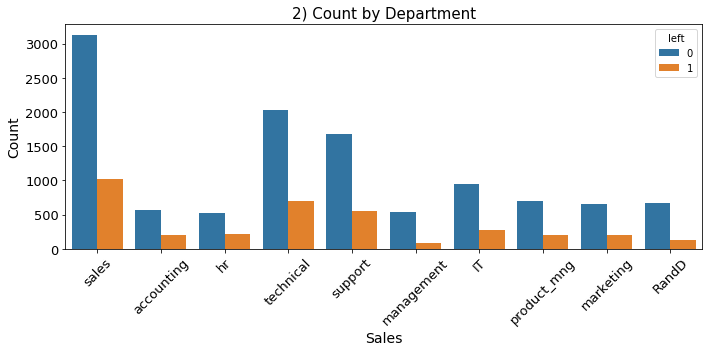

In [159]:
#不同职能部门离职情况
fig = plt.figure(figsize = (10,5))
sns.countplot(x='sales', hue='left', data = data)
plt.xlabel('Sales',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13)
plt.title('2) Count by Department',fontsize=15)
plt.tight_layout()
plt.show()


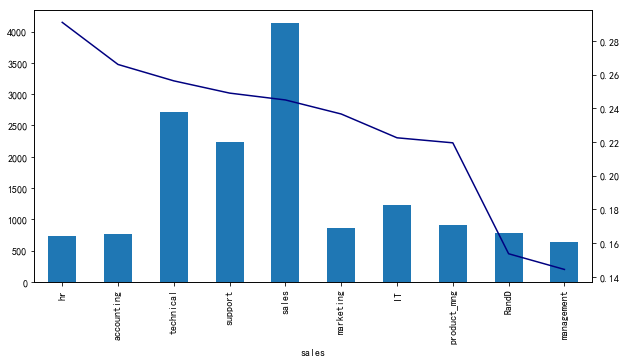

In [270]:
df = data.groupby('sales')['left'].value_counts().unstack()
df["total"]=df[0]+df[1]
df["rate"]=df[1]/df["total"]
fig = plt.figure(figsize = (10,5))
df=df.sort_values(by='rate',ascending=False)
df['rate'].plot(secondary_y = True, label='rate',colormap=plt.get_cmap('jet'))
df['total'].plot(kind='bar', label='total_count')
#df['total'].plot(kind='bar', label='total_count')
plt.show()

In [261]:
'promotion_last_5years' 'Work_accident''salary'

left,sales,0,1,total,rate
3,hr,524,215,739,0.290934
2,accounting,563,204,767,0.265971
9,technical,2023,697,2720,0.256250
8,support,1674,555,2229,0.248991
7,sales,3126,1014,4140,0.244928
5,marketing,655,203,858,0.236597
0,IT,954,273,1227,0.222494
6,product_mng,704,198,902,0.219512
1,RandD,666,121,787,0.153748
4,management,539,91,630,0.144444


In [192]:
离职与满意度

In [208]:
data.groupby('left')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.00
1,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92


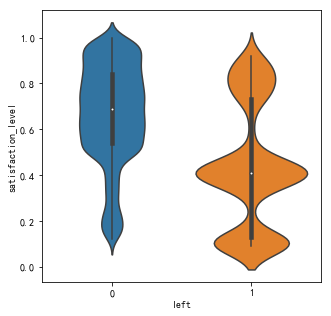

In [201]:
plt.figure(figsize = (5,5))
sns.violinplot(x='left',y='satisfaction_level',data=data)
plt.show()

离职与价值

In [210]:
data.groupby('left')['last_evaluation'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
1,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.0


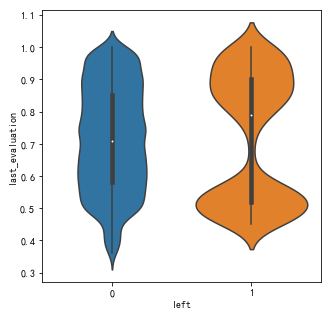

In [211]:
plt.figure(figsize = (5,5))
sns.violinplot(x='left',y='last_evaluation',data=data)
plt.show()

离职与项目数量

In [212]:
data.groupby('left')['number_project'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,3.0,4.0,4.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,4.0,6.0,7.0


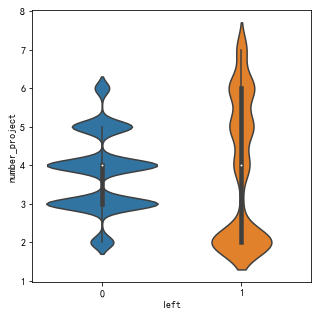

In [213]:
plt.figure(figsize = (5,5))
sns.violinplot(x='left',y='number_project',data=data)
plt.show()

平均每月工作时长

In [214]:
data.groupby('left')['average_montly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,199.060203,45.682731,96.0,162.0,198.0,238.0,287.0
1,3571.0,207.419210,61.202825,126.0,146.0,224.0,262.0,310.0


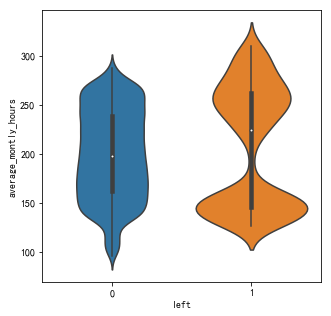

In [215]:
plt.figure(figsize = (5,5))
sns.violinplot(x='left',y='average_montly_hours',data=data)
plt.show()

离职与工作年限

In [217]:
data.groupby('left')['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


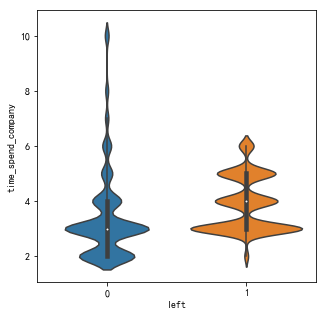

In [218]:
plt.figure(figsize = (5,5))
sns.violinplot(x='left',y='time_spend_company',data=data)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

data_copy = pd.get_dummies(data)
data_copy_information = data_copy.drop(['left'], axis=1).values
data_copy_left = data_copy['left'].values
X_train, X_test, y_train, y_test = train_test_split(data_copy_information, data_copy_left, test_size=0.5)
# LR测试
LR=LogisticRegression()
LR.fit(X_train,y_train)
print('LR\'s accuracy rate:',LR.score(X_test,y_test))
#随机森林测试
rmf=RandomForestClassifier()
rmf.fit(X_train,y_train)
print('rmf\'s accuracy rate:',rmf.score(X_test,y_test))
# SVM测试
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)
print('svm\'s accuracy rate:',svm_model.score(X_test,y_test))

LR's accuracy rate: 0.795066666667
rmf's accuracy rate: 0.986266666667
svm's accuracy rate: 0.9444


In [23]:
# 将特征重要性从小到大排序
indices=np.argsort(rmf.feature_importances_)[::-1]
print(indices)

[ 0  2  4  1  3  5 18 16 17 19 14 15 11  7  9 10 12  6 13  8]


In [24]:
for i in range(data_copy_information.shape[1]):
    print('%d.feature %d %s(%f)'%(i+1,indices[i],data_copy.columns[indices[i]],rmf.feature_importances_[indices[i]]))

1.feature 0 satisfaction_level(0.335546)
2.feature 2 number_project(0.208288)
3.feature 4 time_spend_company(0.169951)
4.feature 1 last_evaluation(0.124743)
5.feature 3 average_montly_hours(0.114973)
6.feature 5 Work_accident(0.009654)
7.feature 18 salary_high(0.006278)
8.feature 16 sales_support(0.004240)
9.feature 17 sales_technical(0.003648)
10.feature 19 salary_low(0.003404)
11.feature 14 sales_product_mng(0.003269)
12.feature 15 sales_sales(0.002366)
13.feature 11 sales_hr(0.002098)
14.feature 7 promotion_last_5years(0.002028)
15.feature 9 sales_RandD(0.001862)
16.feature 10 sales_accounting(0.001821)
17.feature 12 sales_management(0.001637)
18.feature 6 left(0.001632)
19.feature 13 sales_marketing(0.001421)
20.feature 8 sales_IT(0.001141)


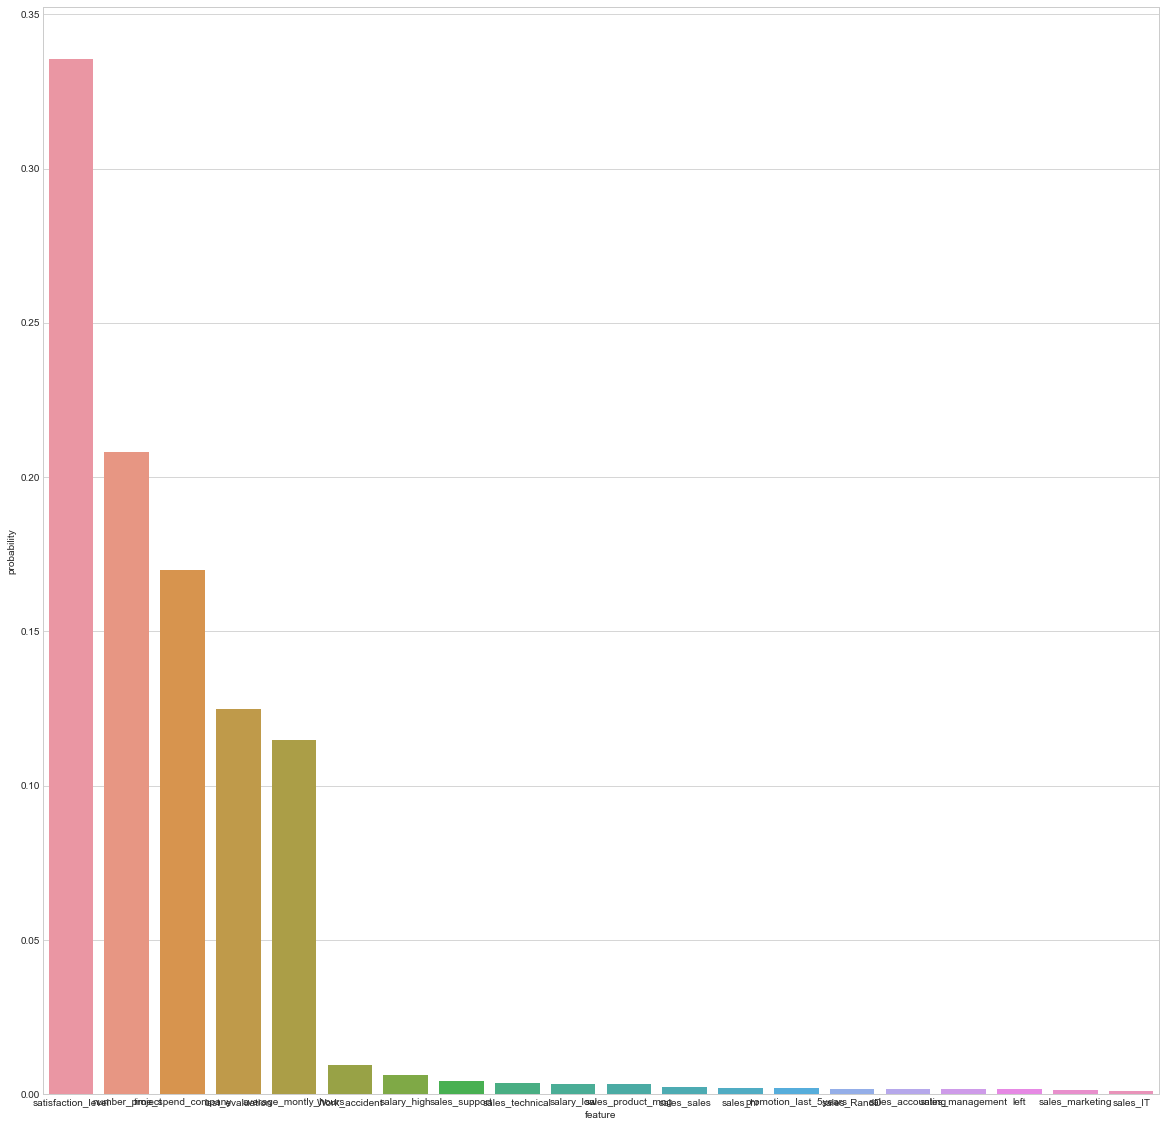

In [26]:
data_feature_names=[]
data_feature_probability=[]
for i in range(data_copy_information.shape[1]):
    # print('%d.feature %d %s(%f)'%(i+1,indices[i],data_copy.columns[indices[i]],rmf.feature_importances_[indices[i]]))
    data_feature_names.append(data_copy.columns[indices[i]])
    data_feature_probability.append(rmf.feature_importances_[indices[i]])
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
sns.barplot(data_feature_names,data_feature_probability)
plt.xlabel('feature')
plt.ylabel('probability')
plt.show()

In [29]:
now_stay = data[data['left'] == 0]
now_stay = pd.get_dummies(now_stay)
now_stay_information = now_stay.drop(['left'], axis=1).values
now_stay_label = now_stay['left'].values
predict = rmf.predict_proba(now_stay_information)
print(sum(predict[:, 1] == 1))
now_stay['maybe leave company']=predict[:,1]
print(now_stay[now_stay['maybe leave company']>=0.5].sort_values('maybe leave company',ascending=False))
outputfile='output.csv'
now_stay[now_stay['maybe leave company']>=0.5].sort_values('maybe leave company',ascending=False).to_csv(outputfile)

4
       satisfaction_level  last_evaluation  number_project  \
5847                 0.77             0.85               5   
3780                 0.86             0.96               5   
7762                 0.82             0.87               5   
6466                 0.39             0.57               2   
7443                 0.85             0.96               4   
7077                 0.90             0.85               4   
2415                 0.92             0.97               4   
10546                0.13             0.61               6   
10237                0.88             0.81               4   
4519                 0.44             0.45               2   
5773                 0.45             0.62               6   
8795                 0.48             0.89               3   
9042                 0.82             0.58               4   
7004                 0.85             0.87               6   
5297                 0.21             0.93               4   
3921  

In [ ]:
### 测试一下